In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/finance-data-project/all_banks


In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_pickle('/kaggle/input/finance-data-project/all_banks')









** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [4]:
tikers = list(df.transpose().index.get_level_values(0).unique())
tikers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [5]:
bank_stocks = df
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

**EDA**

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on Multi-Level Indexing and Using .xs. Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [6]:
bank_stocks.xs('High', level=1, axis=1).max()

Bank Ticker
BAC     55.08
C      570.00
GS     250.70
JPM     70.61
MS      90.95
WFC     58.76
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [7]:
columns = bank_stocks.xs('Close', level=1, axis=1).pct_change()
columns = columns.dropna()
returns = pd.DataFrame(data=columns)
returns = returns.rename(columns={'BAC': 'BAC Return', 'C': 'C Return', 'GS': 'GS Return', 'JPM': 'JPM Return', 'MS': 'MS Return', 'WFC': 'WFC Return'})
returns = returns.replace([np.inf, -np.inf], np.nan).dropna()
returns.head()

Bank Ticker,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.000507,-0.000947


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

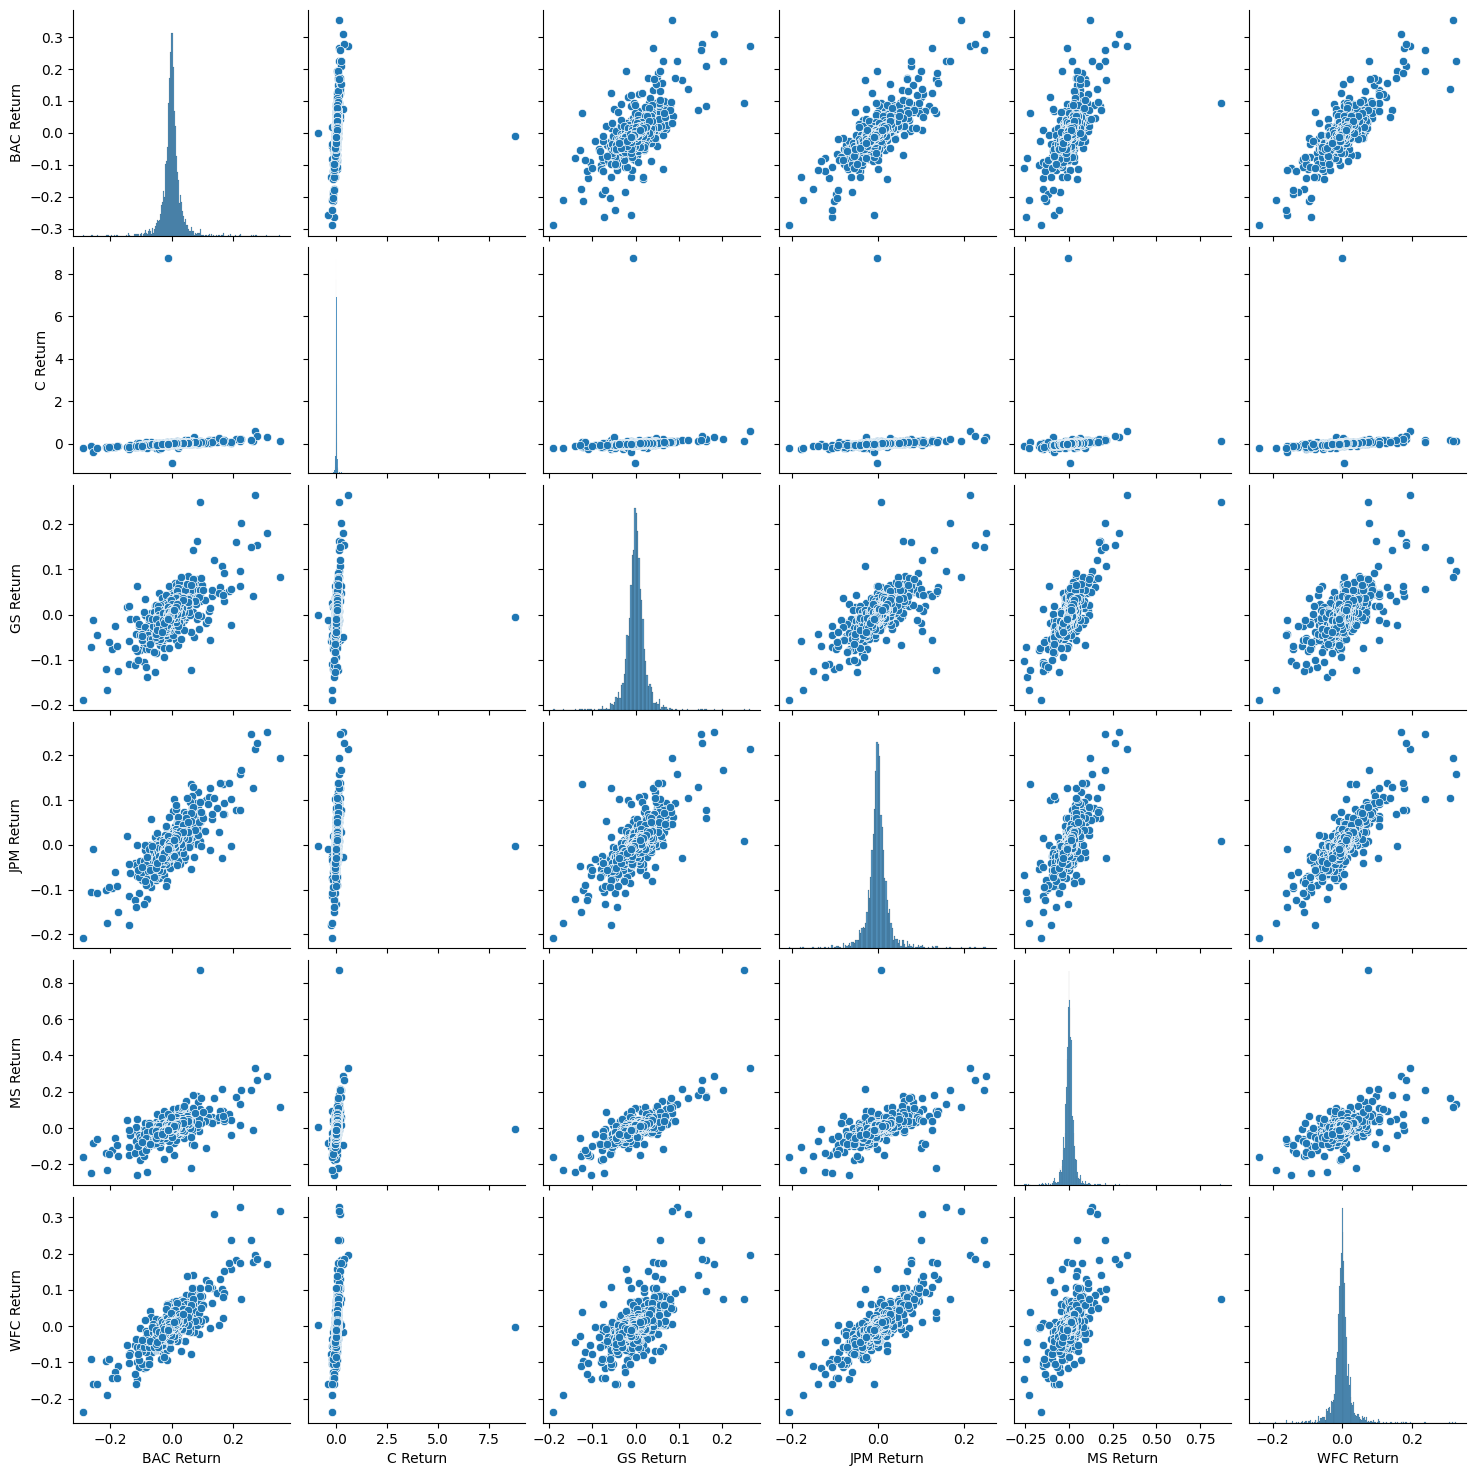

In [8]:
import warnings
warnings.simplefilter("ignore", category=FutureWarning)
sns.pairplot(returns)

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [9]:
returns.idxmax()

Bank Ticker
BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

In [10]:
returns.idxmin()

Bank Ticker
BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [11]:
np.std(returns)

Bank Ticker
BAC Return    0.036643
C Return      0.179933
GS Return     0.025341
JPM Return    0.027651
MS Return     0.037813
WFC Return    0.030227
dtype: float64

In [12]:
returns.loc['2015'].std()

Bank Ticker
BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

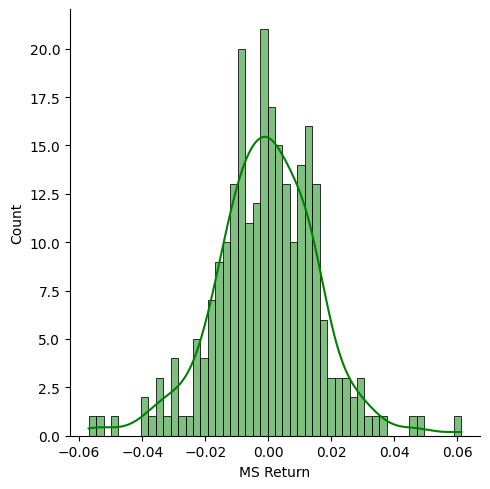

In [13]:
sns.displot(returns.loc['2015']['MS Return'], kde=True, bins=50, color='g')

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

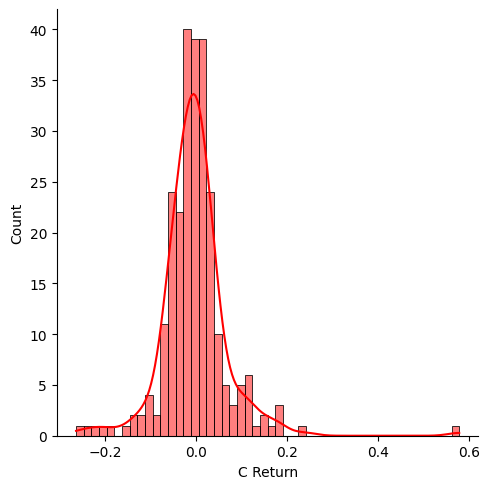

In [14]:
sns.displot(returns.loc['2008']['C Return'], kde=True, color='r', bins=50)

**More Visualization**

A lot of this project will focus on visualizations. 
Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

Imports

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()
pyo.init_notebook_mode(connected=True) 

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use .xs to get a cross section of the data.)**

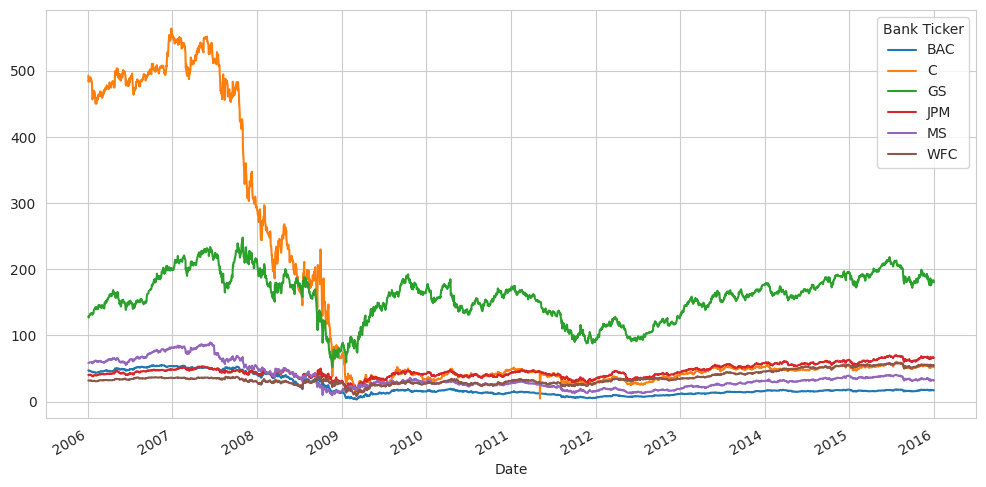

In [16]:
plt.figure(figsize=(12,6))
for i in tikers:
    bank_stocks[str(i)]['Close'].plot(label=str(i))

plt.legend(title='Bank Ticker')

**Moving Averages**

Let's analyze the moving averages for these stocks in the year 2008.

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

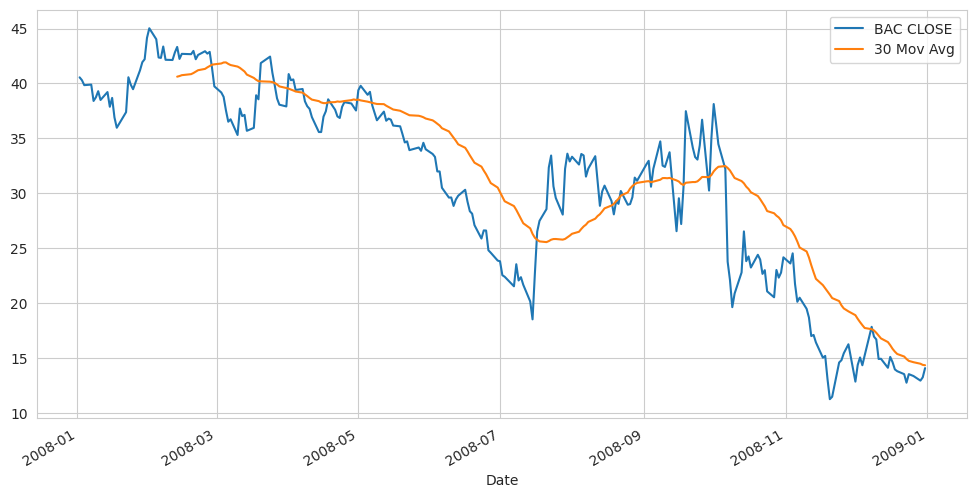

In [17]:
plt.figure(figsize=(12,6))
bank_stocks['BAC'].loc['2008']['Close'].plot(label='BAC CLOSE')
mov_avr = bank_stocks['BAC'].loc['2008']['Close'].rolling(window=30).mean()
plt.plot(mov_avr, label='30 Mov Avg')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

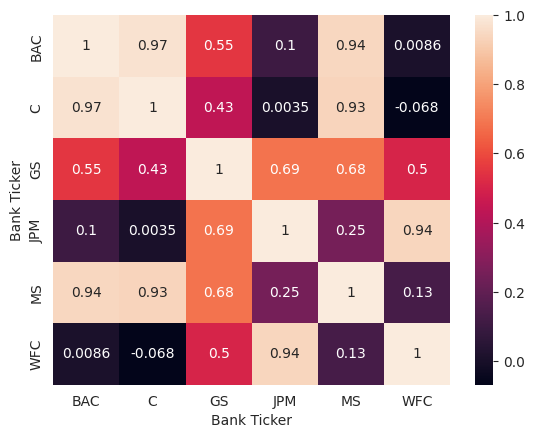

In [35]:
price_cr = bank_stocks.xs('Close', level=1, axis=1).corr()
sns.heatmap(price_cr, annot=True, cmap='rocket')

** Optional: Use seaborn's clustermap to cluster the correlations together:**

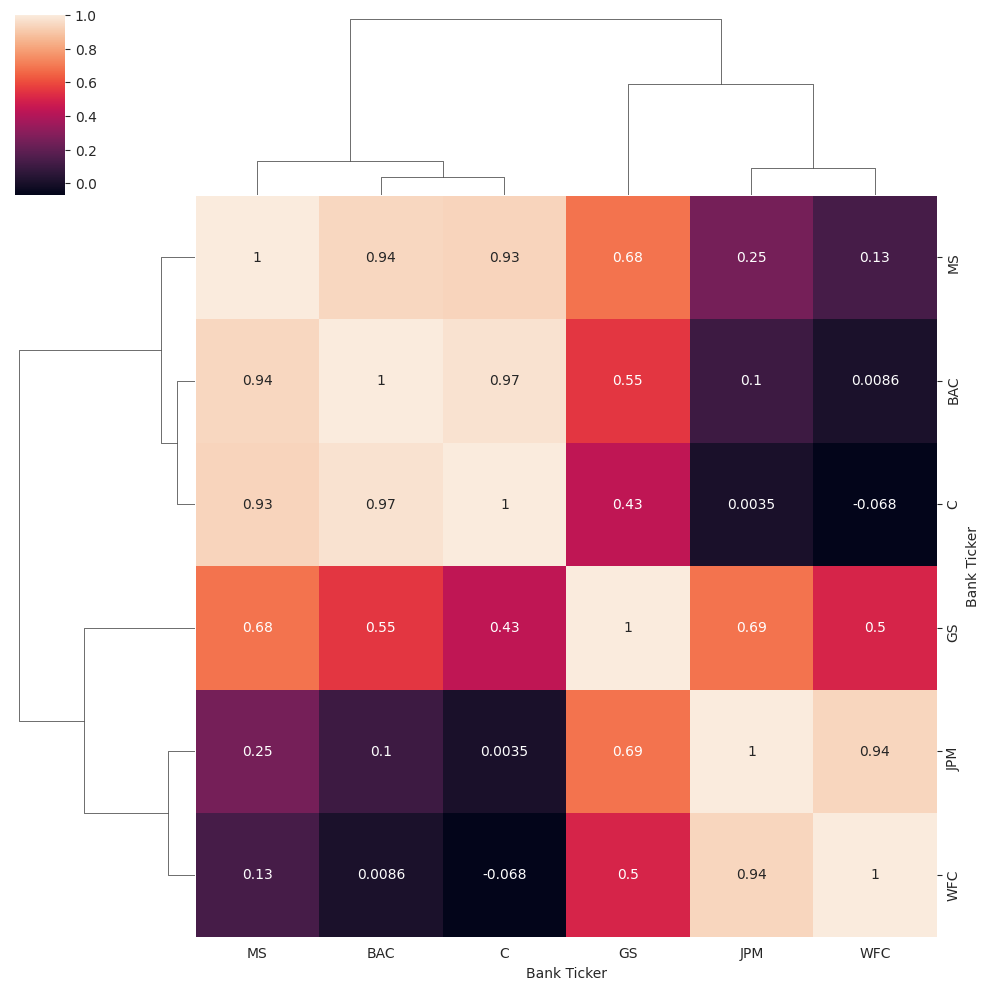

In [37]:
sns.clustermap(price_cr, annot=True, cmap='rocket')